In [64]:
import math as math
import numpy as np

# Class for equation of state fit for planets ... 
class Rocky_Planet_Fit:   
    def __init__(self, rho_0, c, n):
        self.rho_0 = rho_0
        self.c = c
        self.n = n
    # Defining a density method
    def density(self, P):
        if P>0:
            return (self.rho_0 + self.c*P**self.n)
        else:
            return self.rho_0

    
# Class for the derivative of the change in Pressure ... 
def dP_dr(P, m, r):
    # 6.67e-11 is the gravitational constant
    return ((-6.67e-11)*m*trial_planet.density(P)/(r**2))
    
    
# Class for the derivative of the change in Mass ...     
def dm_dr(P, m, r):
    # The way I was able to reach this equation was by plugging in [mass/volume = 
    # m(r)/(4/3*pi*r^3)] into the rho(r) in the m(r)/dr equation ...
    return (4*math.pi*trial_planet.density(P)*(r**2))


# To allow space for trials ...
trial_planet = Rocky_Planet_Fit(8300,0.00349,0.528)
# print(trial_planet)



# The Runge-Kutta for two coupled equations ... 
# WE HAVE TO CREATE A LOOP TO WORK THROUGH THIS ... 

def Runge_Kutta_Function(f, g, x0, y0, t0, dr):
    k1 = dr*f(x0, y0, t0)
    l1 = dr*g(x0, y0, t0)

    k2 = dr*f(x0+k1/2, y0+l1/2 ,t0+dr/2)
    l2 = dr*g(x0+k1/2, y0+l1/2, t0+dr/2)

    k3 = dr*f(x0+k2/2, y0+l2/2, t0+dr/2)
    l3 = dr*g(x0+k2/2, y0+l2/2, t0+dr/2)

    k4 = dr*f(x0+k3/2, y0+l3/2, t0+dr)
    l4 = dr*g(x0+k3/2, y0+l3/2, t0+dr)
    
    x = x0 + ((1/6)*(k1+2*k2+2*k3+k4))
    y = y0 + ((1/6)*(l1+2*l2+2*l3+l4))
    
    return x, y

    
    
# To capture values for future plots ... 
pressure_list = []
radius_list = []
density_list = []
mass_list = []
    
# Initial Conditions ...
r = 5 # in meters
m = 0  # in kilograms
P = 10**12 # in Pascals
dr = 1000 # in meters

while P>0:
    # print(P)
    P,m = Runge_Kutta_Function(dP_dr, dm_dr, P, m, r, dr)
    r += dr
    pressure_list.append(P)
    radius_list.append(r)
    mass_list.append(m)
    density_list.append(trial_planet.density(P))

# To convert the above lists to be in terms of Earth ...
radius_list = np.array(radius_list)
radius_list = radius_list/(6.371e6)


# Final Answers ...
R = radius_list[-1]
M = mass_list[-1]/(5.872e24)
print(R)
print(M)

0.9808515146758751
2.1206477799495853


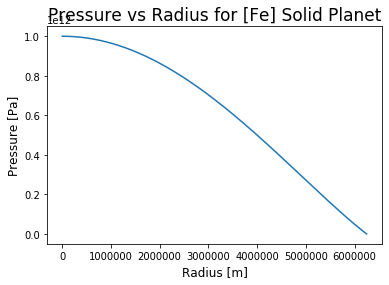

In [65]:
# import matplotlib.pyplot as plt
# Pressure vs Radius Graph

# Converting radius back to m ...
radius_list = radius_list*(6.371e6)

plt.plot(radius_list,pressure_list)
plt.title('Pressure vs Radius for [Fe] Solid Planet', fontsize=17)
plt.xlabel('Radius [m]', fontsize=12)
plt.ylabel('Pressure [Pa]', fontsize=12)
plt.show()

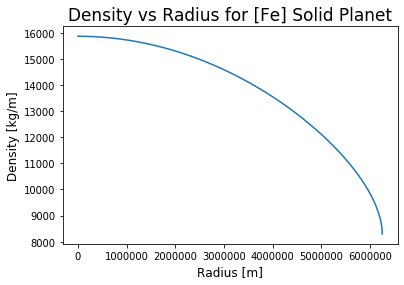

In [66]:
import matplotlib.pyplot as plt
# Density vs Radius Graph

plt.plot(radius_list,density_list)
plt.title('Density vs Radius for [Fe] Solid Planet', fontsize=17)
plt.xlabel('Radius [m]', fontsize=12)
plt.ylabel('Density [kg/m]', fontsize=12)
plt.show()

In [67]:
# PROBLEM 2

In [68]:
# FOR 100 SOLAR MASSES ... 
import math as math
import numpy as np


# Initial Conditions ... 
m = 0
r = 10
P = (1.4e14)
dr = 1000

# To capture values for future plots ... 
pressure_list = []
radius_list = []
density_list = []
mass_list = []

while P>0:
    # print(P)
    P,m = Runge_Kutta_Function(dP_dr, dm_dr, P, m, r, dr)
    r += dr
    pressure_list.append(P)
    radius_list.append(r)
    mass_list.append(m)
    density_list.append(trial_planet.density(P))
    
    
# Final Answers ...
R = radius_list[-1]
M = mass_list[-1]/(5.872e24)
print(R)
print(M)

14476010
99.90101135743346


In [69]:
# FOR 0.1 SOLAR MASSES ... 
import math as math
import numpy as np


# Initial Conditions ... 
m = 0
r = 10
P = (8e10)
dr = 1000

# To capture values for future plots ... 
pressure_list = []
radius_list = []
density_list = []
mass_list = []

while P>0:
    # print(P)
    P,m = Runge_Kutta_Function(dP_dr, dm_dr, P, m, r, dr)
    r += dr
    pressure_list.append(P)
    radius_list.append(r)
    mass_list.append(m)
    density_list.append(trial_planet.density(P))
    
    
# Final Answers ...
R = radius_list[-1]
M = mass_list[-1]/(5.872e24)
print(R)
print(M)

2459010
0.09974033351394453


In [70]:
import math as math
import numpy as np

# Initial Conditions ... 
m = 0
r = 10
P = (8e10)
dr = 900

# To capture values for future plots ... 
pressure_list_new = []
radius_list_new = []
density_list_new = []
mass_list_new = []

for P_c in range(int(8e10), int(1.4e14), int(1e10)):
    # print(P)
    P,m = Runge_Kutta_Function(dP_dr, dm_dr, P, m, r, dr)
    r += dr
    pressure_list_new.append(P)
    radius_list_new.append(r)
    mass_list_new.append(m)
    density_list_new.append(trial_planet.density(P))

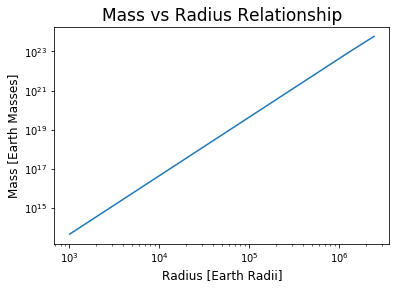

In [71]:
import matplotlib.pyplot as plt
# Pressure vs Radius Graph

# Converting radius back to m ...
R = radius_list[-1]

plt.plot(radius_list,mass_list)
plt.title('Mass vs Radius Relationship', fontsize=17)
plt.xlabel('Radius [Earth Radii]', fontsize=12)
plt.xscale('log')
plt.ylabel('Mass [Earth Masses]', fontsize=12)
plt.yscale('log')
plt.show()

In [72]:
# PROBLEM 3

In [126]:
import math as math
import numpy as np


# FOR H2O ... 
H2O_Planet = Rocky_Planet_Fit(1460,0.00311,0.513)
trial_planet = H2O_Planet

# Initial Conditions ... 
m = 0
r = 10
P = (1.25e13)
dr = 1000

# To set-up necessary lists ... 
pressure_list_H2O = []
radius_list_H2O = []
density_list_H2O = []
mass_list_H2O = []

while P>0:
    # print(P)
    P,m = Runge_Kutta_Function(dP_dr, dm_dr, P, m, r, dr)
    r += dr
    pressure_list_H2O.append(P)
    radius_list_H2O.append(r)
    mass_list_H2O.append(m)
    density_list_H2O.append(trial_planet.density(P))
    
    
# To convert the above lists to be in terms of Earth ...
radius_list_H2O = np.array(radius_list_H2O)
radius_list_H2O = radius_list_H2O/(6.371e6)

mass_list_H2O = np.array(mass_list_H2O)
mass_list_H2O = mass_list_H2O/(5.972e24)

# Final Answers ...
R = radius_list_H2O[-1]
M = mass_list_H2O[-1]
# print(R)
print(M)

100.0792478550152


In [124]:
# Initial Conditions ... 
m = 0
r = 10
P = (8.0e9)
dr = 1000

# To set-up necessary lists ... 
pressure_list_H2O = []
radius_list_H2O = []
density_list_H2O = []
mass_list_H2O = []

while P>0:
    # print(P)
    P,m = Runge_Kutta_Function(dP_dr, dm_dr, P, m, r, dr)
    r += dr
    pressure_list_H2O.append(P)
    radius_list_H2O.append(r)
    mass_list_H2O.append(m)
    density_list_H2O.append(trial_planet.density(P))
    
    
# To convert the above lists to be in terms of Earth ...
radius_list_H2O = np.array(radius_list_H2O)
radius_list_H2O = radius_list_H2O/(6.371e6)

mass_list_H2O = np.array(mass_list_H2O)
mass_list_H2O = mass_list_H2O/(5.972e24)

# Final Answers ...
R = radius_list_H2O[-1]
M = mass_list_H2O[-1]
# print(R)
print(M)

0.09787121285563642


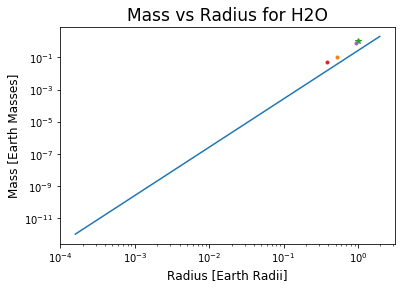

In [136]:
# Initial Conditions ...
m = 0
r = 10
dr = 1000

# To set-up necessary lists ... 
pressure_list_H2O = []
radius_list_H2O = []
density_list_H2O = []
mass_list_H2O = []


for P_c in range(int(8.0e9), int(1.25e14), int(1e10)):
    # print(P)
    P,m = Runge_Kutta_Function(dP_dr, dm_dr, P, m, r, dr)
    r += dr
    pressure_list_H2O.append(P)
    radius_list_H2O.append(r)
    mass_list_H2O.append(m)
    density_list_H2O.append(trial_planet.density(P))
    
# To convert the above lists to be in terms of Earth ...
radius_list_H2O = np.array(radius_list_H2O)
radius_list_H2O = radius_list_H2O/(6.371e6)

mass_list_H2O = np.array(mass_list_H2O)
mass_list_H2O = mass_list_H2O/(5.972e24)

    
    
import matplotlib.pyplot as plt
# Pressure vs Radius Graph

plt.plot(radius_list_H2O,mass_list_H2O)
plt.title('Mass vs Radius for H2O', fontsize=17)
plt.xlabel('Radius [Earth Radii]', fontsize=12)
plt.ylabel('Mass [Earth Masses]', fontsize=12)
plt.xscale('log')
plt.yscale('log')
# To plot specific points ... 
plt.plot(0.53,0.1,'.') # Mars
plt.plot(1,1,'*') # Earth
plt.plot(0.38,0.055,'.') # Mercury
plt.plot(0.9498,0.815,'.') # Venus
plt.show()

In [147]:
import math as math
import numpy as np 


# FOR MgSiO ... 
MgSiO_Planet = Rocky_Planet_Fit(4260,0.00127,0.549)
trial_planet = MgSiO_Planet

# Initial Conditions ... 
m = 0
r = 10
P = (3.1e10)
dr = 1000

# To set-up necessary lists ... 
pressure_list_MgSiO = []
radius_list_MgSiO = []
density_list_MgSiO = []
mass_list_MgSiO = []

while P>0:
    # print(P)
    P,m = Runge_Kutta_Function(dP_dr, dm_dr, P, m, r, dr)
    r += dr
    pressure_list_MgSiO.append(P)
    radius_list_MgSiO.append(r)
    mass_list_MgSiO.append(m)
    density_list_MgSiO.append(trial_planet.density(P))
    
    
# To convert the above lists to be in terms of Earth ...
radius_list_MgSiO = np.array(radius_list_MgSiO)
radius_list_MgSiO = radius_list_MgSiO/(6.371e6)

mass_list_MgSiO = np.array(mass_list_MgSiO)
mass_list_MgSiO = mass_list_MgSiO/(5.972e24)

# Final Answers ...
R = radius_list_MgSiO[-1]
M = mass_list_MgSiO[-1]
# print(R)
print(M)

0.09880773304158326


In [151]:
# Initial Conditions ... 
m = 0
r = 10
P = (3.5e13)
dr = 1000

# To set-up necessary lists ... 
pressure_list_MgSiO = []
radius_list_MgSiO = []
density_list_MgSiO = []
mass_list_MgSiO = []

while P>0:
    # print(P)
    P,m = Runge_Kutta_Function(dP_dr, dm_dr, P, m, r, dr)
    r += dr
    pressure_list_MgSiO.append(P)
    radius_list_MgSiO.append(r)
    mass_list_MgSiO.append(m)
    density_list_MgSiO.append(trial_planet.density(P))
    
    
# To convert the above lists to be in terms of Earth ...
radius_list_MgSiO = np.array(radius_list_MgSiO)
radius_list_MgSiO = radius_list_MgSiO/(6.371e6)

mass_list_MgSiO = np.array(mass_list_MgSiO)
mass_list_MgSiO = mass_list_MgSiO/(5.972e24)

# Final Answers ...
R = radius_list_MgSiO[-1]
M = mass_list_MgSiO[-1]
# print(R)
print(M)

98.8758288806883


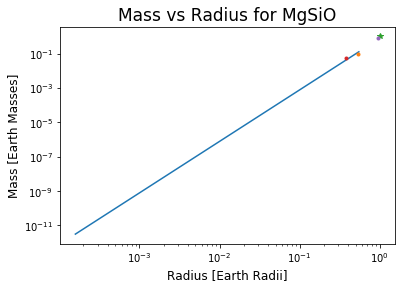

In [157]:
# Initial Conditions ...
m = 0
r = 10
dr = 1000

# To set-up necessary lists ... 
pressure_list_MgSiO = []
radius_list_MgSiO = []
density_list_MgSiO = []
mass_list_MgSiO = []


for P_c in range(int(3.1e10), int(3.5e13), int(1e10)):
    # print(P)
    P,m = Runge_Kutta_Function(dP_dr, dm_dr, P, m, r, dr)
    r += dr
    pressure_list_MgSiO.append(P)
    radius_list_MgSiO.append(r)
    mass_list_MgSiO.append(m)
    density_list_MgSiO.append(trial_planet.density(P))
    
# To convert the above lists to be in terms of Earth ...
radius_list_MgSiO = np.array(radius_list_MgSiO)
radius_list_MgSiO = radius_list_MgSiO/(6.371e6)

mass_list_MgSiO = np.array(mass_list_MgSiO)
mass_list_MgSiO = mass_list_MgSiO/(5.972e24)




import matplotlib.pyplot as plt
# Pressure vs Radius Graph

plt.plot(radius_list_MgSiO,mass_list_MgSiO)
plt.title('Mass vs Radius for MgSiO', fontsize=17)
plt.xlabel('Radius [Earth Radii]', fontsize=12)
plt.ylabel('Mass [Earth Masses]', fontsize=12)
plt.xscale('log')
plt.yscale('log')
# To plot specific points ... 
plt.plot(0.53,0.1,'.') # Mars
plt.plot(1,1,'*') # Earth
plt.plot(0.38,0.055,'.') # Mercury
plt.plot(0.9498,0.815,'.') # Venus
plt.show()